<a href="https://colab.research.google.com/github/DiegoFChaves/WordCloud/blob/main/IAFIN_Arvores_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Árvores**

## 1. Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Amostragem holdout
from sklearn.model_selection import train_test_split

In [ ]:
# Modelos de árvores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Avaliação da aprendizagem
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Avaliação do resultado da árvore
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [ ]:
# GDrive
from google.colab import files

## 2. Seleção e Preparação de Dados

In [ ]:
arquivo = files.upload()

Saving LIVRARIAS_DORELA_MOD.xls to LIVRARIAS_DORELA_MOD.xls


In [ ]:
df = pd.read_excel('LIVRARIAS_DORELA_MOD.xls', sheet_name='DADOS')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CLIENTE       3000 non-null   object
 1   STATUS        3000 non-null   object
 2   IDADE         3000 non-null   int64 
 3   UNIFED        3000 non-null   object
 4   BSTATE_SP     3000 non-null   int64 
 5   BSTATE_RJ     3000 non-null   int64 
 6   FONE          3000 non-null   object
 7   BFONE         3000 non-null   int64 
 8   INSTRU        3000 non-null   object
 9   BINST_PR_SEC  3000 non-null   int64 
 10  BINST_SUP     3000 non-null   int64 
 11  CARTAO        3000 non-null   object
 12  BCARD         3000 non-null   int64 
 13  RESTR         3000 non-null   object
 14  BRESTR        3000 non-null   int64 
 15  RESID         3000 non-null   object
 16  BRESID        3000 non-null   int64 
 17  ATRASO        3000 non-null   int64 
 18  FICÇÃO        3000 non-null   object
 19  BFIX  

In [ ]:
df.head(20)

,CLIENTE,STATUS,IDADE,UNIFED,BSTATE_SP,BSTATE_RJ,FONE,BFONE,INSTRU,BINST_PR_SEC,...,RESID,BRESID,ATRASO,FICÇÃO,BFIX,NÃOFICÇAO,BNOFIX,AUTOAJUDA,BAUTAJ,CATEG
0,LDOR_0001,MAU,26,SP,1,0,SIM,1,PRIM & SEC,1,...,PROP,1,41,SIM,1,NAO,0,SIM,1,1
1,LDOR_0002,MAU,43,SP,1,0,SIM,1,SUP,0,...,ALUG,0,40,NAO,0,NAO,0,SIM,1,1
2,LDOR_0003,BOM,33,OUTROS,0,0,SIM,1,SUP,0,...,PROP,1,3,SIM,1,NAO,0,NAO,0,0
3,LDOR_0004,BOM,39,RJ,0,1,SIM,1,MV,0,...,PROP,1,4,SIM,1,NAO,0,NAO,0,1
4,LDOR_0005,BOM,43,OUTROS,0,0,SIM,1,PRIM & SEC,1,...,PROP,1,0,SIM,1,NAO,0,NAO,0,1
5,LDOR_0006,BOM,40,RJ,0,1,SIM,1,PRIM & SEC,1,...,PROP,1,1,SIM,1,NAO,0,SIM,1,1
6,LDOR_0007,MAU,39,SP,1,0,SIM,1,SUP,0,...,PROP,1,32,SIM,1,NAO,0,NAO,0,0
7,LDOR_0008,BOM,50,SP,1,0,SIM,1,MV,0,...,PROP,1,4,SIM,1,NAO,0,NAO,0,0
8,LDOR_0009,BOM,51,OUTROS,0,0,SIM,1,PRIM & SEC,1,...,PROP,1,1,SIM,1,NAO,0,NAO,0,0
9,LDOR_0010,BOM,45,OUTROS,0,0,SIM,1,PRIM & SEC,1,...,PROP,1,4,SIM,1,NAO,0,NAO,0,0


In [ ]:
y = df['STATUS']
y

,STATUS
0,MAU
1,MAU
2,BOM
3,BOM
4,BOM
...,...
2995,MAU
2996,BOM
2997,BOM
2998,MAU


In [ ]:
y.value_counts()/sum(y.value_counts())

,count
STATUS,
BOM,0.8
MAU,0.2


In [ ]:
X_num = df[['IDADE']]
X_cat = df[['UNIFED', 'FONE', 'INSTRU', 'CARTAO', 'RESTR', 'RESID', 'FICÇÃO', 'NÃOFICÇAO', 'AUTOAJUDA']]

<Axes: ylabel='Frequency'>

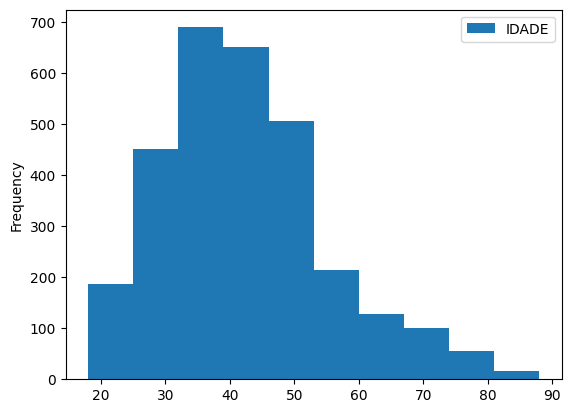

In [ ]:
X_num.plot.hist()

In [ ]:
q1 = X_num['IDADE'].quantile(0.25)
q3 = X_num['IDADE'].quantile(0.75)
iqr = q3 - q1

filtro = ((X_num['IDADE'] >= q1 - 1.5 * iqr) & (X_num['IDADE'] <= q3 + 1.5 * iqr))
X_num[filtro].max()

,0
IDADE,73
IDADE_CATEG,D


<Axes: >

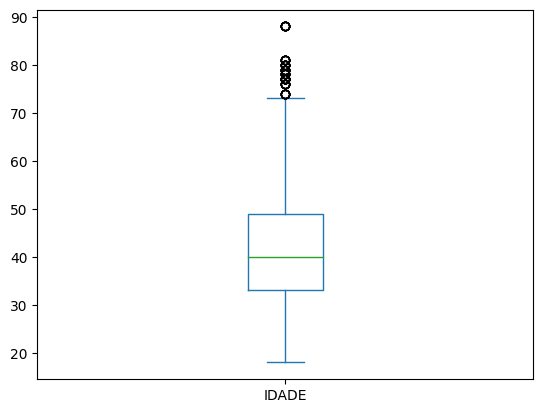

In [ ]:
X_num.IDADE.plot.box()

In [ ]:
pd.qcut(X_num.IDADE, q=4).cat.categories

IntervalIndex([(17.999, 33.0], (33.0, 40.0], (40.0, 49.0], (49.0, 88.0]], dtype='interval[float64, right]')

In [ ]:
#idade_categs = pd.cut(X_num.IDADE, bins=8, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
idade_categs = pd.qcut(X_num.IDADE, q=4, labels=['A', 'B', 'C', 'D'])
idade_categs

,IDADE
0,A
1,C
2,A
3,B
4,C
...,...
2995,A
2996,C
2997,A
2998,A


In [ ]:
idade_categs.cat.categories

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
idade_categs.value_counts()

,count
IDADE,
A,800
C,760
B,738
D,702


In [ ]:
X_num['IDADE_CATEG'] = idade_categs
X_num

<ipython-input-177-336a33b69c30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num['IDADE_CATEG'] = idade_categs


,IDADE,IDADE_CATEG
0,26,A
1,43,C
2,33,A
3,39,B
4,43,C
...,...,...
2995,33,A
2996,41,C
2997,25,A
2998,30,A


In [ ]:
X_cat

,UNIFED,FONE,INSTRU,CARTAO,RESTR,RESID,FICÇÃO,NÃOFICÇAO,AUTOAJUDA
0,SP,SIM,PRIM & SEC,SIM,SIM,PROP,SIM,NAO,SIM
1,SP,SIM,SUP,NAO,SIM,ALUG,NAO,NAO,SIM
2,OUTROS,SIM,SUP,NAO,SIM,PROP,SIM,NAO,NAO
3,RJ,SIM,MV,SIM,NAO,PROP,SIM,NAO,NAO
4,OUTROS,SIM,PRIM & SEC,SIM,NAO,PROP,SIM,NAO,NAO
...,...,...,...,...,...,...,...,...,...
2995,OUTROS,SIM,MV,NAO,SIM,PROP,NAO,NAO,SIM
2996,RJ,SIM,PRIM & SEC,NAO,NAO,PROP,SIM,NAO,NAO
2997,OUTROS,NÃO,PRIM & SEC,SIM,NAO,PROP,SIM,NAO,SIM
2998,SP,SIM,PRIM & SEC,SIM,NAO,PROP,SIM,NAO,NAO


In [ ]:
# Tratamento dos dados categóricos
X_cat = X_cat.astype('category')
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   UNIFED     3000 non-null   category
 1   FONE       3000 non-null   category
 2   INSTRU     3000 non-null   category
 3   CARTAO     3000 non-null   category
 4   RESTR      3000 non-null   category
 5   RESID      3000 non-null   category
 6   FICÇÃO     3000 non-null   category
 7   NÃOFICÇAO  3000 non-null   category
 8   AUTOAJUDA  3000 non-null   category
dtypes: category(9)
memory usage: 27.6 KB


In [ ]:
X_num_categ = pd.get_dummies(X_num['IDADE_CATEG'], dtype=int)
X_num_categ

,A,B,C,D
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
2995,1,0,0,0
2996,0,0,1,0
2997,1,0,0,0
2998,1,0,0,0


In [ ]:
# Construção de variáveis dummy
X_cat_dummies = pd.get_dummies(X_cat, dtype=int, drop_first=True)
X_cat_dummies

,UNIFED_RJ,UNIFED_SP,FONE_SIM,INSTRU_PRIM & SEC,INSTRU_SUP,CARTAO_NAO,CARTAO_SIM,RESTR_SIM,RESID_PROP,FICÇÃO_SIM,NÃOFICÇAO_SIM,AUTOAJUDA_SIM
0,0,1,1,1,0,0,1,1,1,1,0,1
1,0,1,1,0,1,1,0,1,0,0,0,1
2,0,0,1,0,1,1,0,1,1,1,0,0
3,1,0,1,0,0,0,1,0,1,1,0,0
4,0,0,1,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,1,0,0,1,0,1,1,0,0,1
2996,1,0,1,1,0,1,0,0,1,1,0,0
2997,0,0,0,1,0,0,1,0,1,1,0,1
2998,0,1,1,1,0,0,1,0,1,1,0,0


In [ ]:
#X = pd.concat([X_num, X_cat_dummies], axis=1)
X = pd.concat([X_num_categ, X_cat_dummies], axis=1)
X.head()

,A,B,C,D,UNIFED_RJ,UNIFED_SP,FONE_SIM,INSTRU_PRIM & SEC,INSTRU_SUP,CARTAO_NAO,CARTAO_SIM,RESTR_SIM,RESID_PROP,FICÇÃO_SIM,NÃOFICÇAO_SIM,AUTOAJUDA_SIM
0,1,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1
1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,1
2,1,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0
3,0,1,0,0,1,0,1,0,0,0,1,0,1,1,0,0
4,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0


In [ ]:
XX = X[filtro]
yy = y[filtro]

In [ ]:
print("Tamanho Filtrado: ", len(XX))

Tamanho Filtrado:  2928


In [ ]:
yy.value_counts()/sum(yy.value_counts())

,count
STATUS,
BOM,0.795082
MAU,0.204918


In [ ]:
# Separação treinamento/teste (holdout)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.25, random_state=42)

In [ ]:
print("Treinamento: ", len(X_train))
print("Teste      : ", len(X_test))

Treinamento:  2196
Teste      :  732


## Treinamento e Avaliação

In [ ]:
X_train.head()

,IDADE,UNIFED_OUTROS,UNIFED_RJ,UNIFED_SP,FONE_NÃO,FONE_SIM,INSTRU_MV,INSTRU_PRIM & SEC,INSTRU_SUP,CARTAO_MV,...,RESTR_NAO,RESTR_SIM,RESID_ALUG,RESID_PROP,FICÇÃO_NAO,FICÇÃO_SIM,NÃOFICÇAO_NAO,NÃOFICÇAO_SIM,AUTOAJUDA_NAO,AUTOAJUDA_SIM
2922,54,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,1,1,0,0,1
340,44,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
1099,41,1,0,0,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,0,1
1543,69,1,0,0,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
748,53,0,0,1,0,1,1,0,0,0,...,0,1,1,0,0,1,0,1,1,0


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',
                            class_weight={'BOM': 0.8, 'MAU': 0.2},
                            max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'BOM': 0.8, 'MAU': 0.2},
                       criterion='entropy', max_depth=20)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         BOM       0.87      0.96      0.91       591
         MAU       0.68      0.39      0.50       141

    accuracy                           0.85       732
   macro avg       0.77      0.67      0.70       732
weighted avg       0.83      0.85      0.83       732



In [ ]:
confusion_matrix(y_test, y_pred_dt)

array([[565,  26],
       [ 86,  55]])

In [ ]:
print("Acurácia      : %.5f" % accuracy_score(y_test, y_pred_dt))
print("Precisão (BOM): %.5f" % precision_score(y_test, y_pred_dt, pos_label='BOM'))
print("Precisão (MAU): %.5f" % precision_score(y_test, y_pred_dt, pos_label='MAU'))

Acurácia      : 0.84699
Precisão (BOM): 0.86790
Precisão (MAU): 0.67901


In [ ]:
dt.get_depth()

17

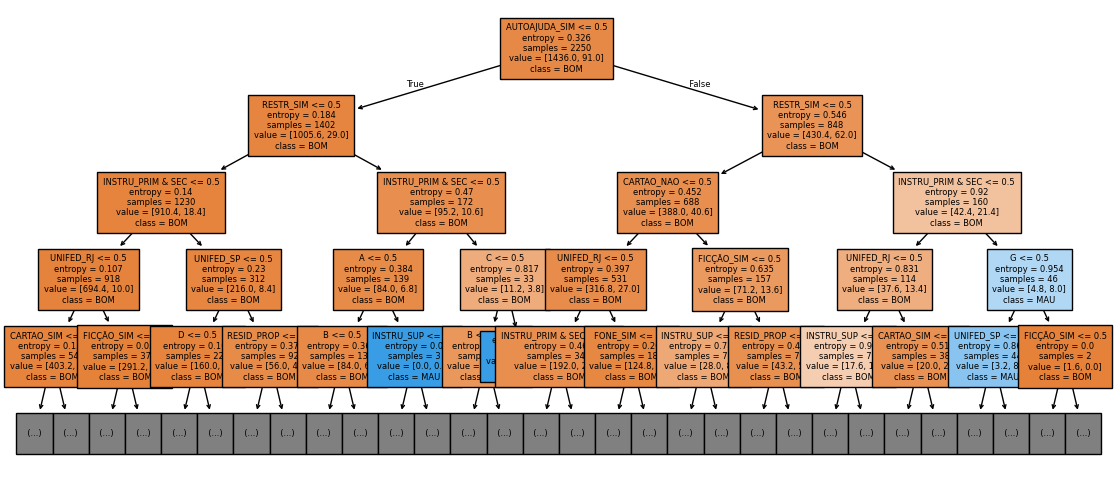

In [ ]:
plt.figure(figsize=(14, 6))
plot_tree(dt,
          feature_names=X_train.columns,
          class_names=['BOM', 'MAU'],
          fontsize=6,
          filled=True,
          max_depth=4)
plt.show()

In [ ]:
print(export_text(dt, feature_names=X_train.columns))

|--- AUTOAJUDA_SIM <= 0.50
|   |--- RESTR_SIM <= 0.50
|   |   |--- INSTRU_PRIM & SEC <= 0.50
|   |   |   |--- UNIFED_RJ <= 0.50
|   |   |   |   |--- CARTAO_SIM <= 0.50
|   |   |   |   |   |--- CARTAO_NAO <= 0.50
|   |   |   |   |   |   |--- D <= 0.50
|   |   |   |   |   |   |   |--- class: MAU
|   |   |   |   |   |   |--- D >  0.50
|   |   |   |   |   |   |   |--- class: BOM
|   |   |   |   |   |--- CARTAO_NAO >  0.50
|   |   |   |   |   |   |--- UNIFED_SP <= 0.50
|   |   |   |   |   |   |   |--- A <= 0.50
|   |   |   |   |   |   |   |   |--- B <= 0.50
|   |   |   |   |   |   |   |   |   |--- D <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- FICÇÃO_SIM <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: BOM
|   |   |   |   |   |   |   |   |   |   |--- FICÇÃO_SIM >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- D >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: BOM
|   |   |   |   | 

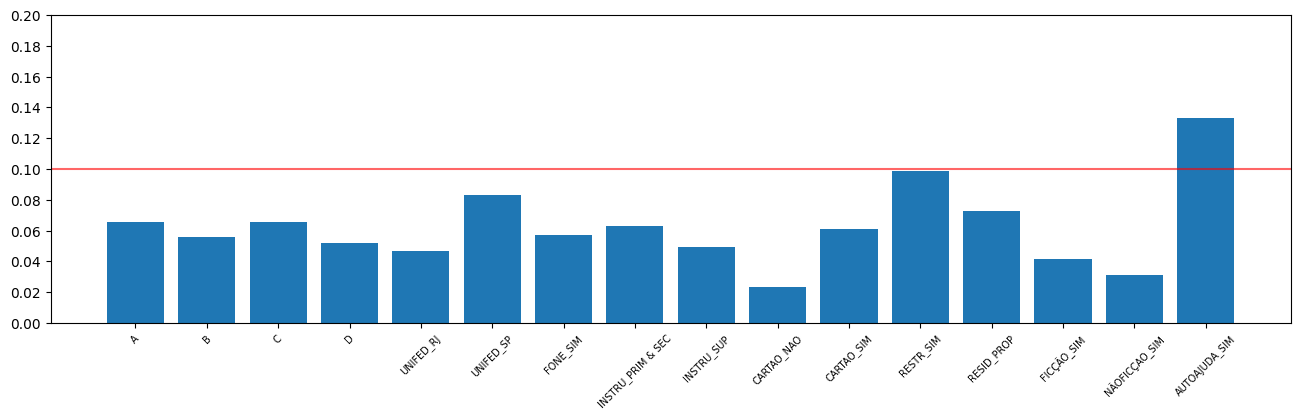

In [ ]:
plt.figure(figsize=(16, 4))
plt.bar(X_train.columns, dt.feature_importances_)
plt.xticks(fontsize=7, rotation=45)
plt.yticks(np.array(list(range(0, 21, 2)))/100)
plt.axhline(0.1, color='red', alpha=0.6)
plt.show()